In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import datetime    #The datetime module supplies classes for manipulating dates and times.
import math
import random

In [13]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

HTTPError: HTTP Error 404: Not Found

In [6]:
confirmed_df.head()

NameError: name 'confirmed_df' is not defined

In [7]:
cols = confirmed_df.keys()
print(cols)

NameError: name 'confirmed_df' is not defined

In [8]:
#Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
print(deaths)

NameError: name 'confirmed_df' is not defined

In [9]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

NameError: name 'confirmed' is not defined

In [10]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

NameError: name 'dates' is not defined

In [11]:
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

NameError: name 'dates' is not defined

In [10]:
#Convert integer into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

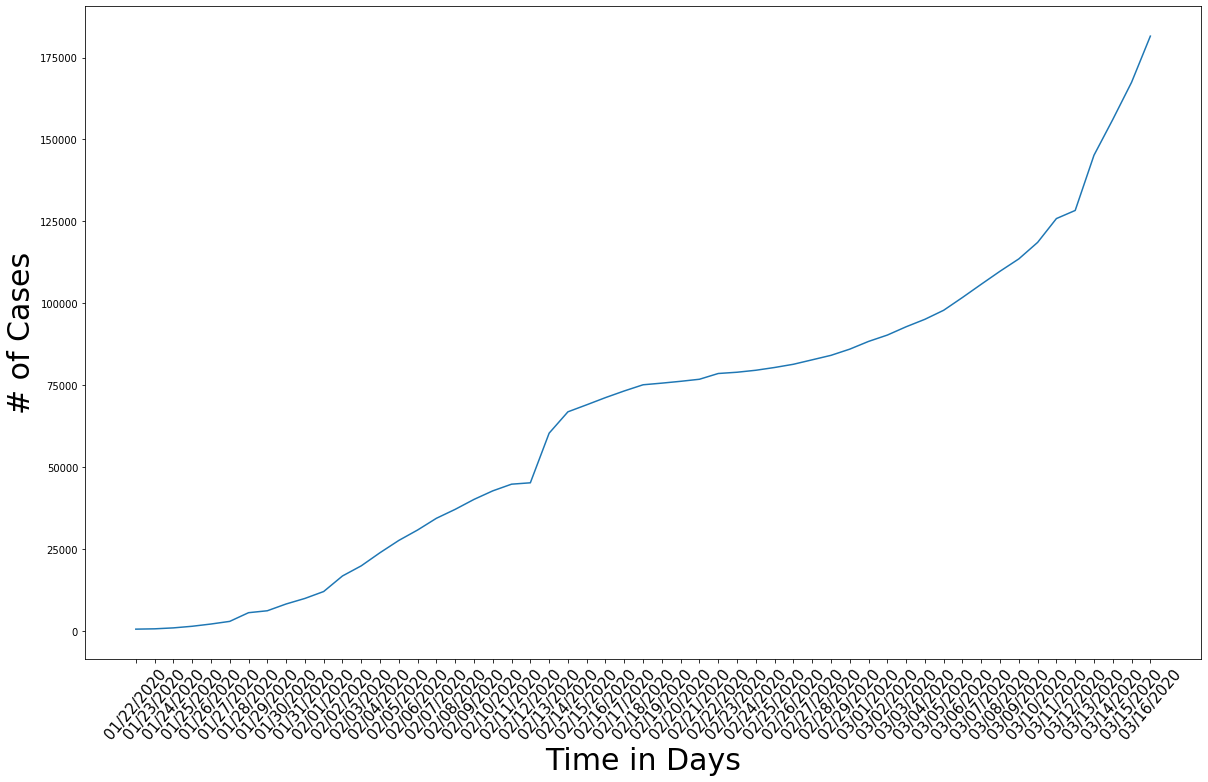

In [11]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.xlabel('Time in Days', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

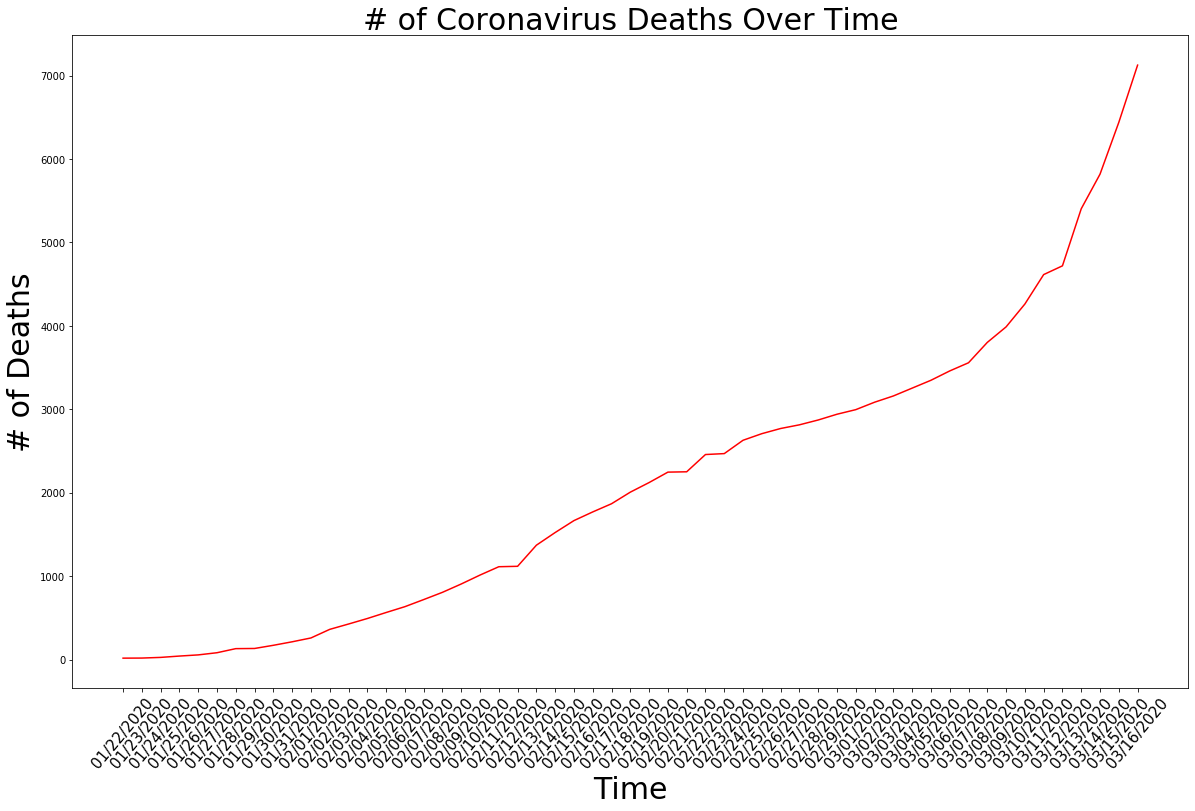

In [12]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

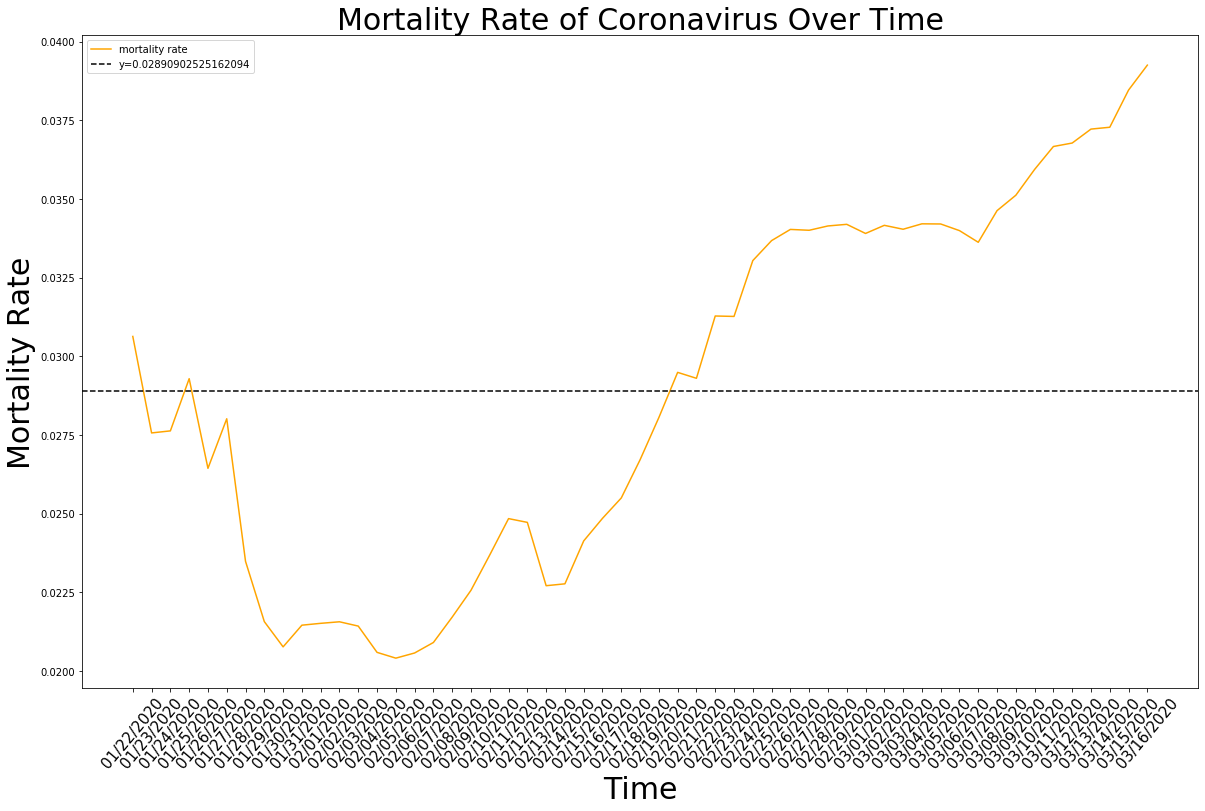

In [13]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

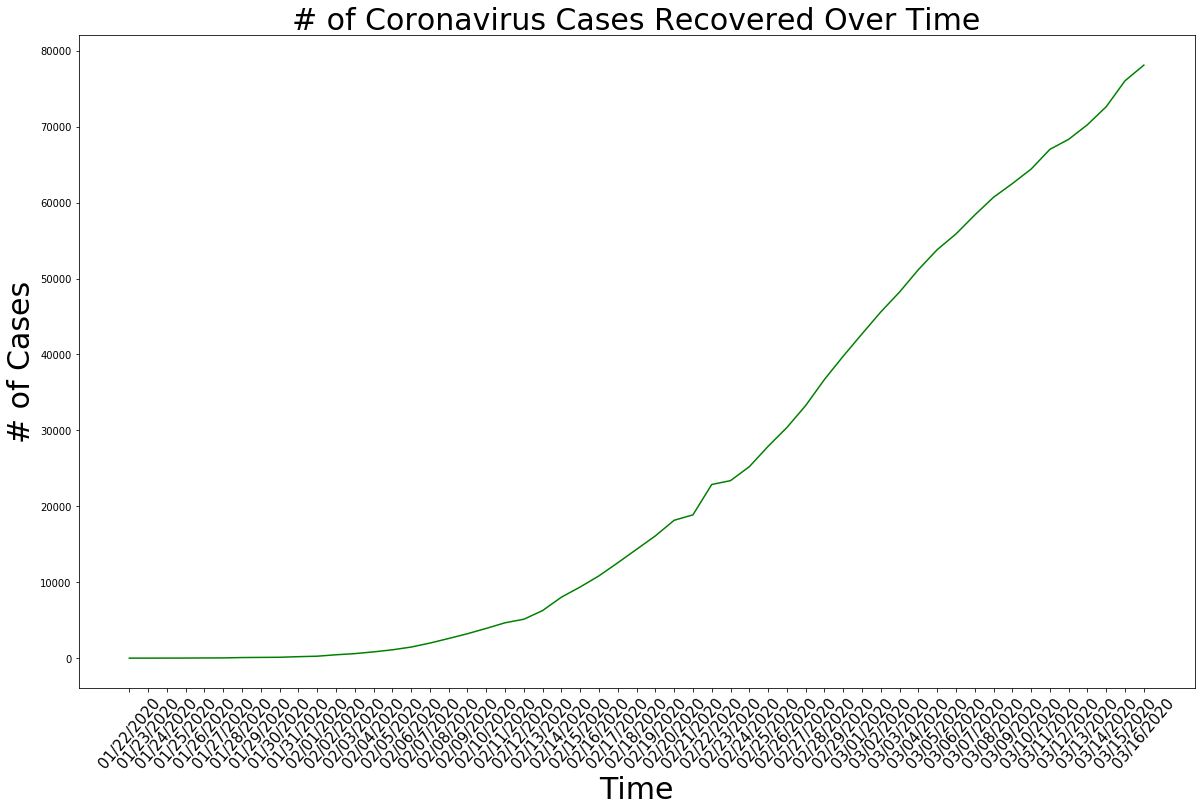

In [14]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

In [15]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

In [16]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [17]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

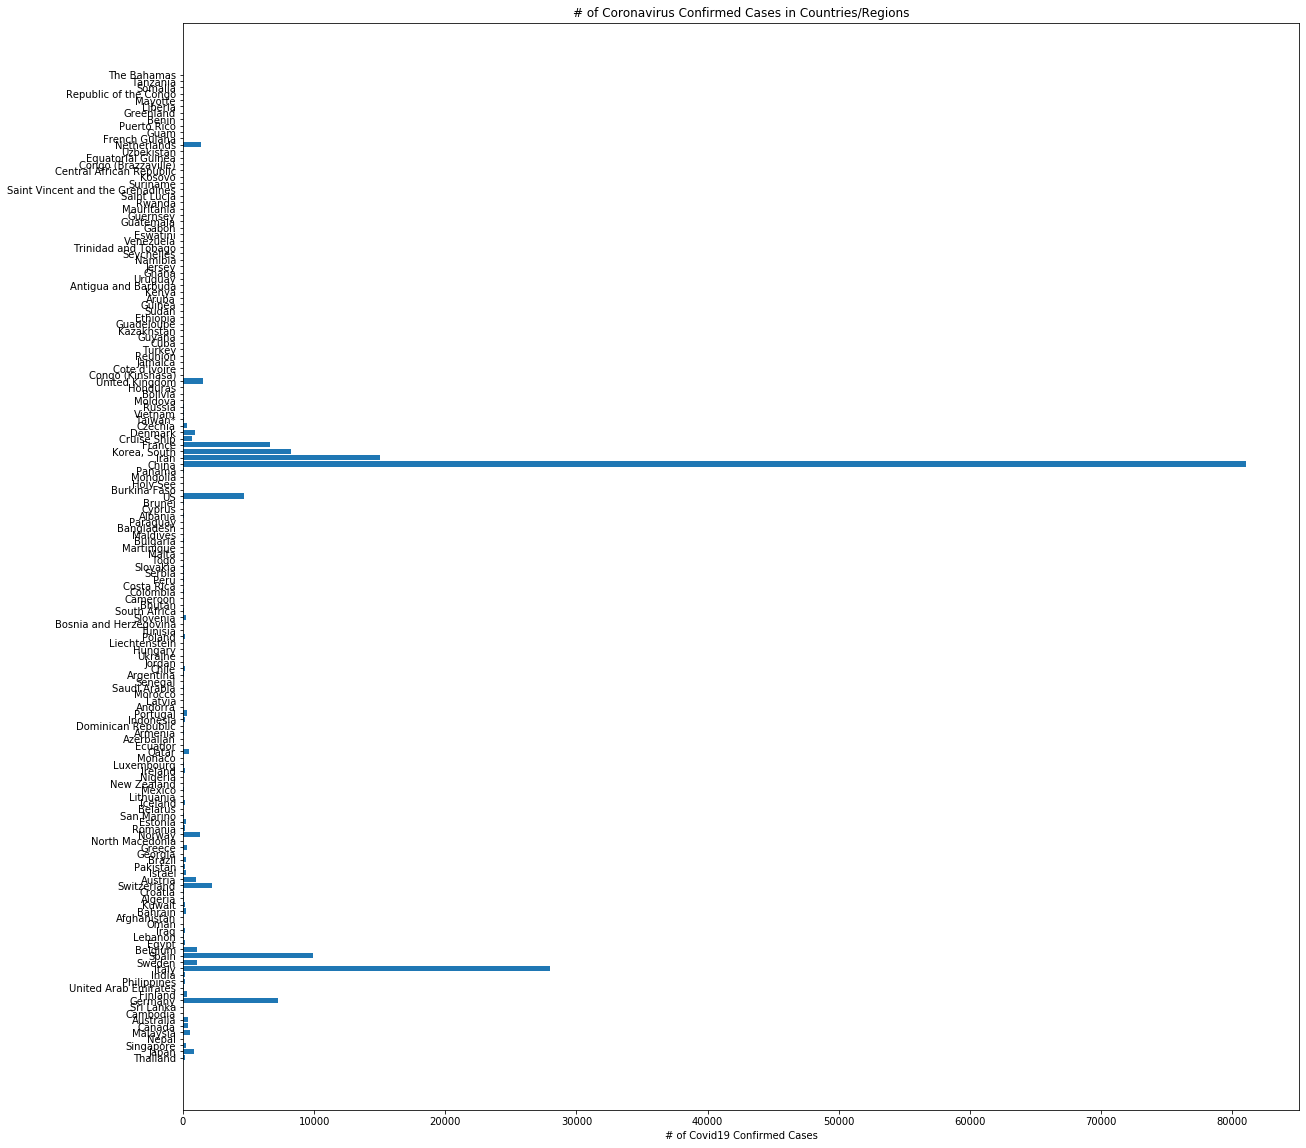

In [18]:
plt.figure(figsize=(20, 20))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('# of Coronavirus Confirmed Cases in Countries/Regions')
plt.xlabel('# of Covid19 Confirmed Cases')
plt.show()

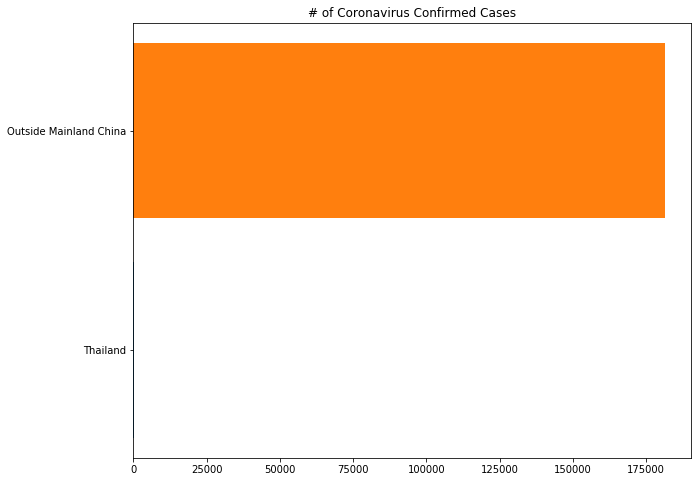

In [19]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases[1:])
plt.figure(figsize=(10, 8))
plt.barh(unique_countries[0], country_confirmed_cases[0])
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases')
plt.show()

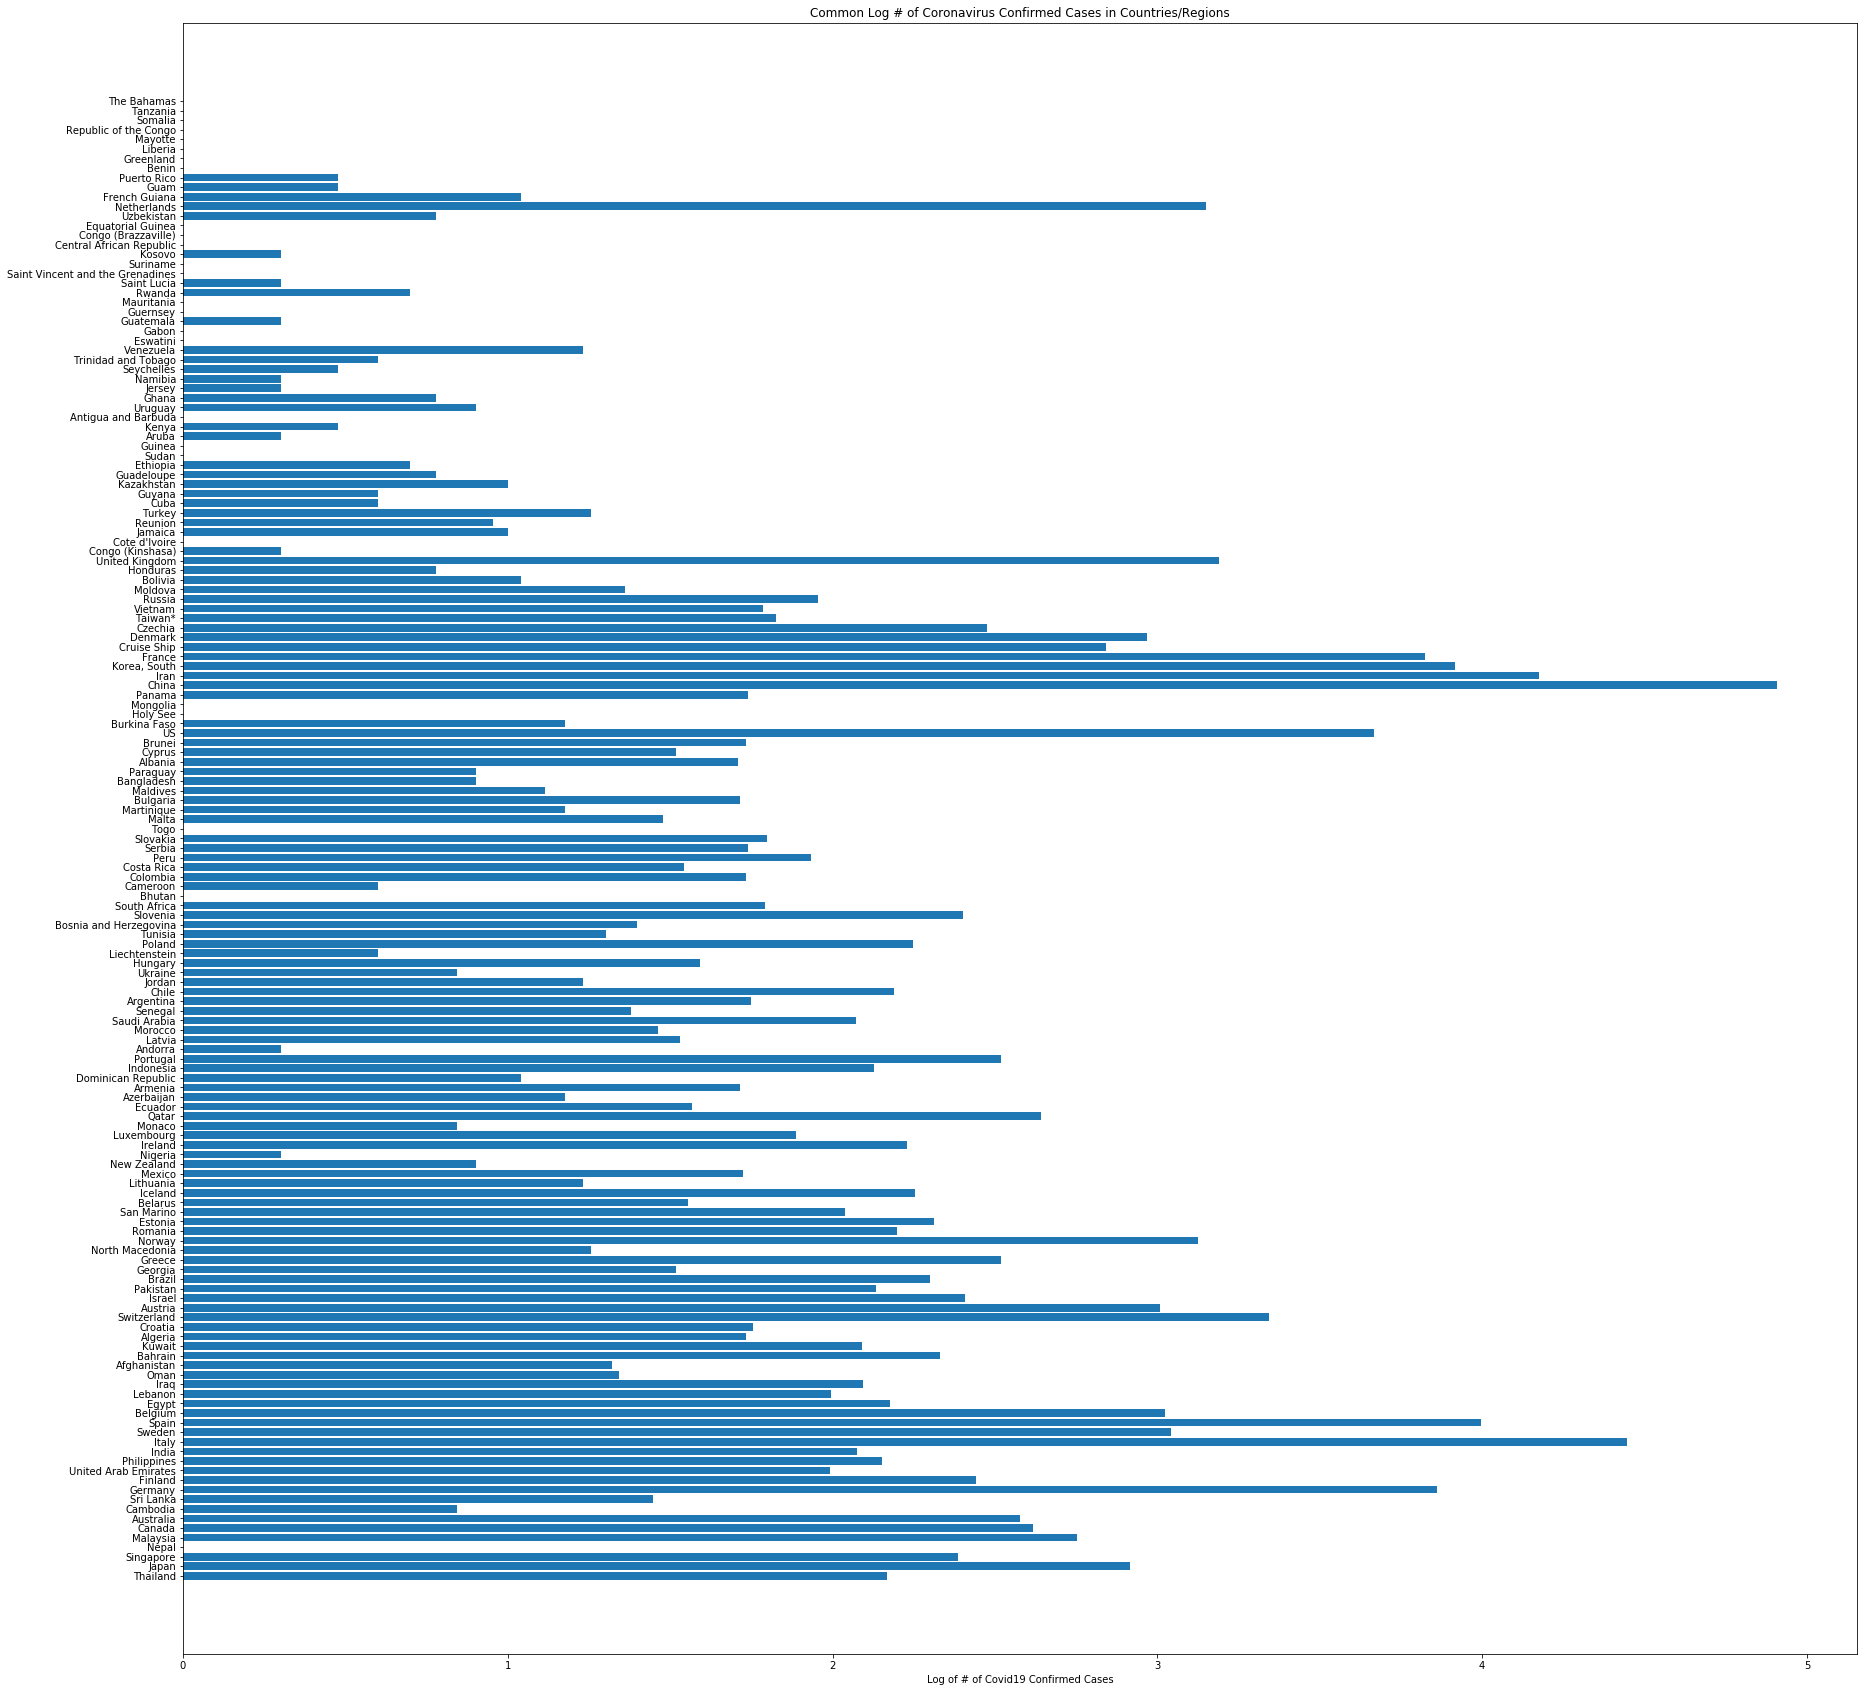

In [22]:
log_country_confirmed_cases = [math.log10(i) for i in country_confirmed_cases]
plt.figure(figsize=(30,30))
plt.barh(unique_countries, log_country_confirmed_cases)
plt.title('Common Log # of Coronavirus Confirmed Cases in Countries/Regions')
plt.xlabel('Log of # of Covid19 Confirmed Cases')
plt.show()

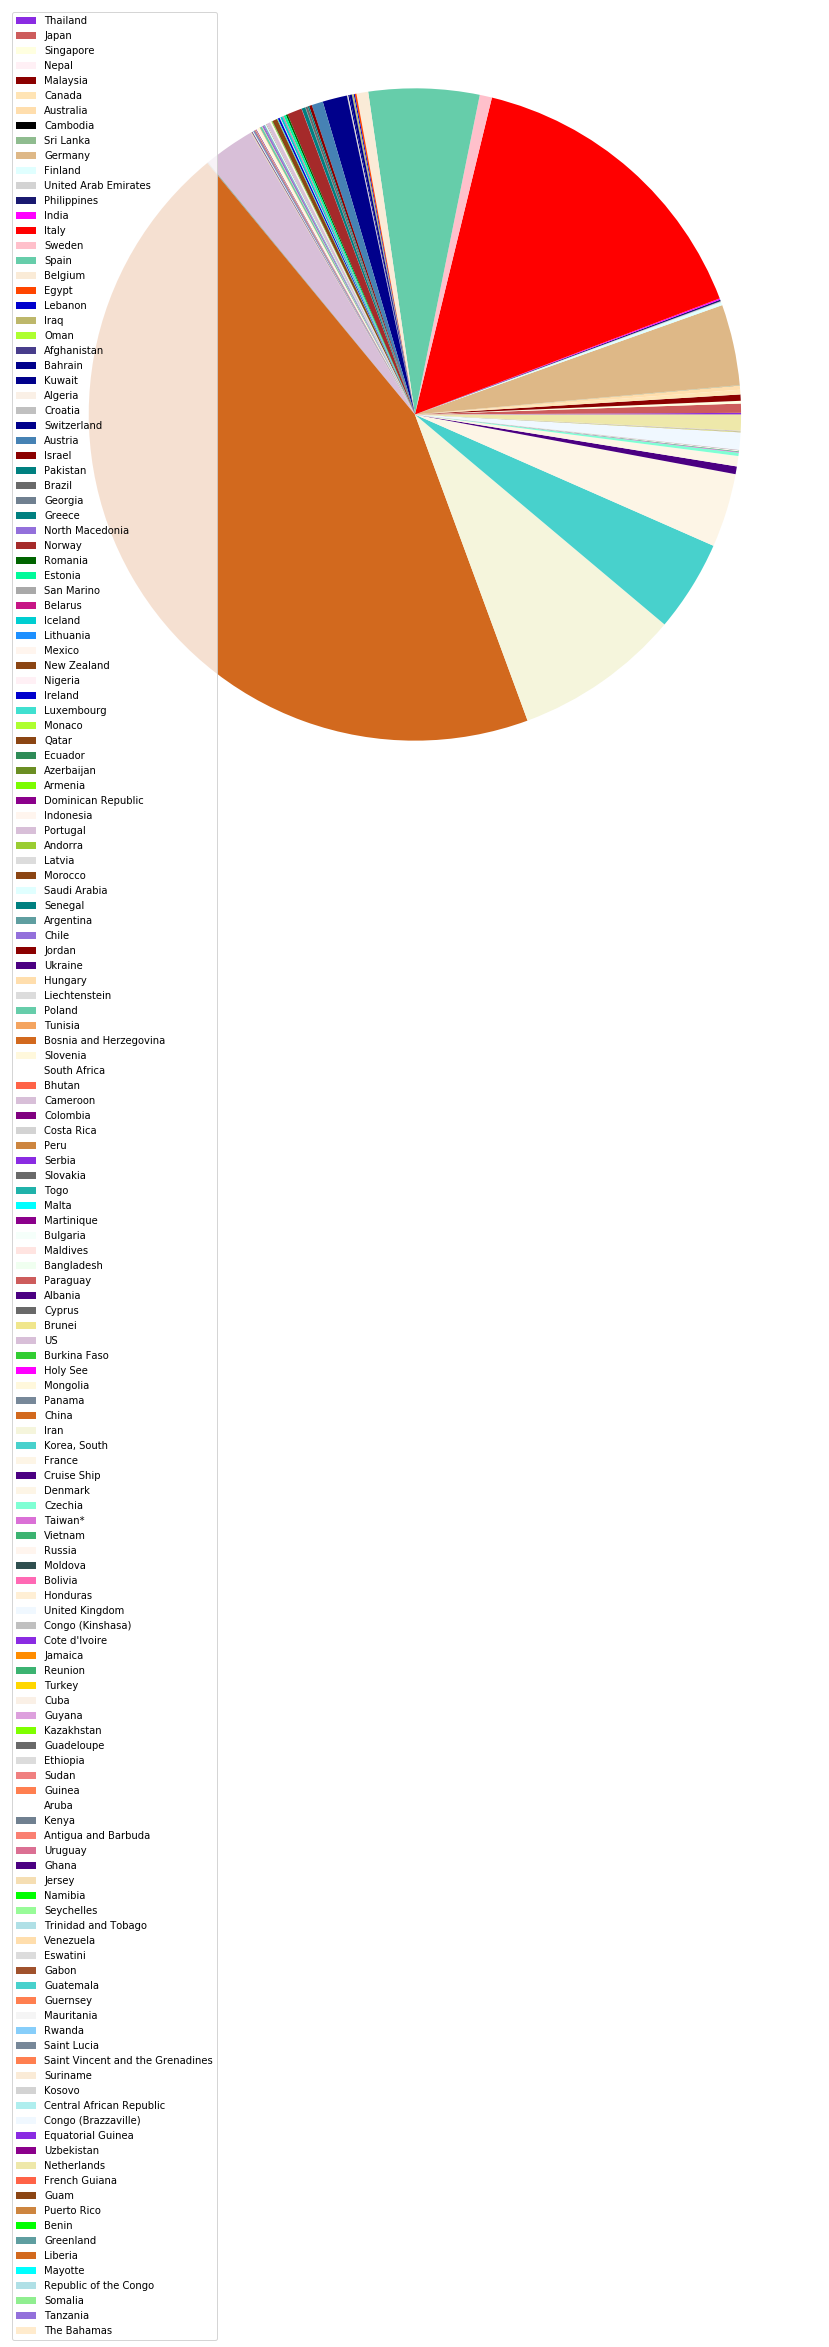

In [21]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(15,15))
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()